Welcome to the Garment Supply Chain Simulation App


Enter the total number of planning periods as an integer number:  2
Enter the total number of washing times for a Garment as an integer:  3
Enter the emmision amount for washing each garment:  2
Enter the energy amount for washing each garment:  1
Enter the total cost amount for washing each garment:  3
Enter the emission amount for producing each recyclable garment:  4
Enter the energy amount for producing each recyclable garment:  2
Enter the cost amount for producing each recyclable garment:  1
Enter the emission amount for producing each disposable garment:  2
Enter the energy amount for producing each disposable garment:  3
Enter the cost amount for producing each disposable garment:  2
Enter the cost amount for producing each disposable garment:  1
Enter an integer upper-bound for the number of hospitals in a planning horizon:  5
Enter an integer lower-bound for the number of hospitals in a planning horizon:  3
Enter an integer lower-bound for the number of orders per hospitals i

   Period  N. Hospitals  Order Size  Mode1 Emission  Mode2 Emission  \
0       1             3         144           100.0           136.0   
1       2             3         155           152.0            80.0   

   Mode1 Energy  Mode2 Energy  Laundry Emission  Laundry Energy  Mode1 Cost  \
0          50.0         204.0             152.0            76.0        25.0   
1          76.0         120.0             230.0           115.0        38.0   

   Mode2 Cost  Laundry Cost  
0        68.0         228.0  
1        40.0         345.0  


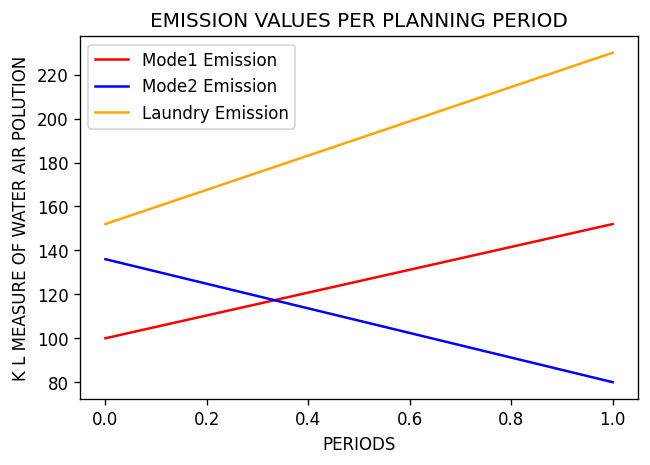

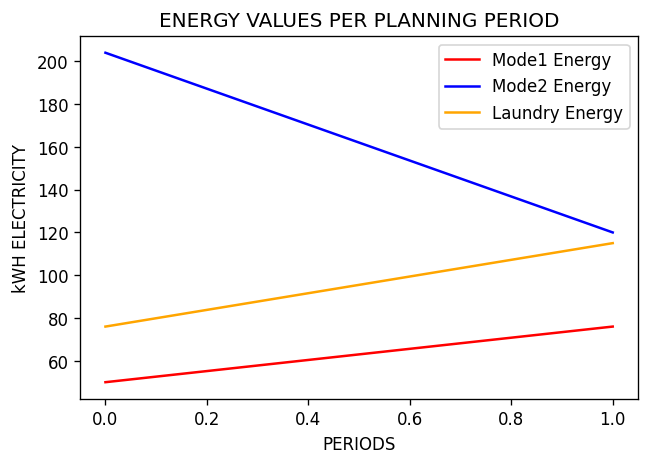

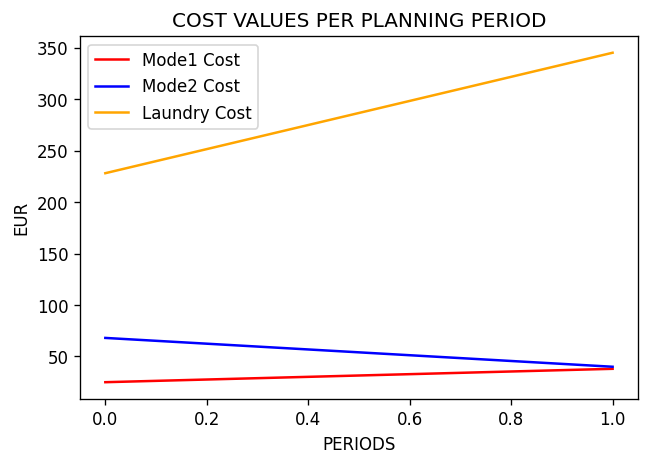

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


print("Welcome to the Garment Supply Chain Simulation App")

total_periods = int(input("Enter the total number of planning periods as an integer number: "))

washing_times = int(input("Enter the total number of washing times for a Garment as an integer: "))

emission_washing_garment=float(input("Enter the emmision amount for washing each garment: "))

energy_washing_garment=float(input("Enter the energy amount for washing each garment: "))

cost_washing_garment=float(input("Enter the total cost amount for washing each garment: "))

emission_mode1=float(input("Enter the emission amount for producing each recyclable garment: "))

energy_mode1=float(input("Enter the energy amount for producing each recyclable garment: "))

cost_mode1=float(input("Enter the cost amount for producing each recyclable garment: "))

emission_mode2=float(input("Enter the emission amount for producing each disposable garment: "))

energy_mode2=float(input("Enter the energy amount for producing each disposable garment: "))

cost_mode2=float(input("Enter the cost amount for producing each disposable garment: "))

cost_mode2=float(input("Enter the cost amount for producing each disposable garment: "))

hospital_uper=int(input("Enter an integer upper-bound for the number of hospitals in a planning horizon: "))

hospital_lower=float(input("Enter an integer lower-bound for the number of hospitals in a planning horizon: "))

hospital_order_lower=float(input("Enter an integer lower-bound for the number of orders per hospitals in a planning horizon: "))

hospital_order_upper=float(input("Enter an integer upper-bound for the number of orders per hospitals in a planning horizon: "))

mode1_persent=float(input("Enter the share of recyclable products: "))

class Laundry:
    def __init__(self, period, ordersize):

        self.period = period
        self.ordersize = ordersize
        self.emission = emission_washing_garment*ordersize  # kg in 60 degree
        self.energy = energy_washing_garment*ordersize  # (kWh/kg)
        self.cost = cost_washing_garment*ordersize  # (EUR/Num)

        # waterperorder = 5
        # self.resources = [waterperorder*ordersize]

        # otherperorder = 50
        # self.othercosts = ordersize*otherperorder


class Manufacturer:
    def __init__(self, m_id, cap, period, ordersize, mode):
        self.cap = cap
        self.period = period
        self.ordersize = ordersize
        self.m_id = m_id
        self.mode = mode  # Currently just limited to Two modes
        if mode == 1:
            # Water, emissions to air k l MEASURE OF WATER AIR POLUTION #np.exp(ordersize)
            self.emission = emission_mode1*ordersize
            self.energy = energy_mode1*ordersize
            self.cost = cost_mode1*ordersize  # (EUR/Num)
            # waterperorder = 20  # Water Per Order
            # fabricperorder = 10  # Fabric Per Order
            # self.resources = [fabricperorder *
            #                   ordersize, waterperorder*ordersize]
            # otherperorder = 50  # Other Costs Per Order
            # self.othercosts = ordersize*otherperorder
        else:
            self.emission = emission_mode2*ordersize
            self.energy = energy_mode2*ordersize
            self.cost = cost_mode2*ordersize  # (EUR/Num)
            # waterperorder = 20  # Water Per Order
            # fiberperorder = 10  # Fabric Per Order
            # self.resources = [fiberperorder*ordersize, waterperorder*ordersize]
            # otherperorder = 50  # Other Costs Per Order
            #self.othercosts = ordersize*otherperorder
# Manufacturer(m_id, cap, period, ordersize, mode)



class Supply_Chain:
    def __init__(self, period, number_of_hospitals, hospitals_order_size, number_of_manufacturers, number_of_mode1_manu, caplist, assign_to_mode1):

        self.period = period
        self.hospitalnum = number_of_hospitals
        total_order_size = sum(hospitals_order_size)
        self.ordertotal = total_order_size
        self.number_of_mode1_manu = number_of_mode1_manu
        number_of_mode2_manu = number_of_manufacturers-number_of_mode1_manu
        self.number_of_mode2_manu = number_of_mode2_manu
        assign_to_mode1 = round(total_order_size*assign_to_mode1/100)
        self.assign_to_mode1 = assign_to_mode1
        # Total capacity shouldn't be less than total ordersize
        assign_to_mode2 = total_order_size-assign_to_mode1
        self.assign_to_mode2 = assign_to_mode2
        self.assign = [assign_to_mode1, assign_to_mode2]

        manufacturerlist = []
        for manu in range(number_of_manufacturers):
            if manu < number_of_mode1_manu and assign_to_mode1 > 0:

                manufacturer = Manufacturer(
                    manu, caplist[manu], period, min(caplist[manu], round(assign_to_mode1/washing_times)), 1)

                manufacturerlist.append(manufacturer)

                assign_to_mode1 = assign_to_mode1 - \
                    min(caplist[manu], assign_to_mode1)
               # print(f"Orthers to Manufacturer {manu} assigend")
            elif assign_to_mode2 > 0:
                for manu in range(self.number_of_mode2_manu):

                    manufacturer = Manufacturer(
                        manu, caplist[manu], period, min(caplist[manu+self.number_of_mode1_manu], assign_to_mode2), 2)

                    manufacturerlist.append(manufacturer)
                    assign_to_mode2 = assign_to_mode2 - \
                        min(caplist[manu+self.number_of_mode1_manu],
                            assign_to_mode2)

        self.manufacturer = manufacturerlist

        self.laundry = Laundry(self.period, self.assign_to_mode1 -
                               round(assign_to_mode1/washing_times))
        
        
        

        
        
        
supply_chain = []
data_lst = []
# hospitals_order_size1 = []
for periods in range(total_periods):
    #Supply_Chain(period, number_of_hospitals, hospitals_order_size, number_of_manufacturers, number_of_mode1_manu, caplist, assign_to_mode1)
    number_of_hospitals1 = np.random.randint(hospital_lower, hospital_uper)
    ordersizes=list(np.random.randint(hospital_order_lower, hospital_order_upper, size=number_of_hospitals1))
    totalorder=sum(ordersizes)
    sup = Supply_Chain(periods, number_of_hospitals1, list(np.random.randint(
        hospital_order_lower, hospital_order_upper, size=number_of_hospitals1)), 2, 1, [10**10, 10**10], mode1_persent*totalorder)
    supply_chain.append(sup)
    data_lst.append([periods+1, sup.hospitalnum, sup.ordertotal,
                    sup.manufacturer[0].emission, sup.manufacturer[1].emission, sup.manufacturer[0].energy, sup.manufacturer[1].energy, sup.laundry.emission, sup.laundry.energy, sup.manufacturer[0].cost, sup.manufacturer[1].cost, sup.laundry.cost])


df = pd.DataFrame(data_lst, columns=['Period', "N. Hospitals", "Order Size", "Mode1 Emission",
                  "Mode2 Emission", "Mode1 Energy", "Mode2 Energy", "Laundry Emission", "Laundry Energy", "Mode1 Cost", "Mode2 Cost", "Laundry Cost"])
print(df)

# df.to_csv('file_name.csv')
fig, ax = plt.subplots(dpi=120)
df.plot(kind="line", y="Mode1 Emission", ax=ax, color="red")
df.plot(kind="line", y="Mode2 Emission", ax=ax, color="blue")
df.plot(kind="line", y="Laundry Emission", ax=ax, color="orange")
ax.set_xlabel("PERIODS")
ax.set_ylabel("K L MEASURE OF WATER AIR POLUTION")
plt.title("EMISSION VALUES PER PLANNING PERIOD")
plt.show()

# fig, ax = plt.subplots(dpi=120)
# df.plot(kind="area", y="Mode1 Emission", ax=ax, color="red")
# df.plot(kind="area", y="Mode2 Emission", ax=ax, color="blue")
# df.plot(kind="area", y="Laundry Emission", ax=ax, color="orange")
# ax.set_xlabel("PERIODS")
# ax.set_ylabel("K L MEASURE OF WATER AIR POLUTION")
# plt.title("EMISSION VALUES PER PLANNING PERIOD")
# plt.show()

fig, ax = plt.subplots(dpi=120)
df.plot(kind="line", y="Mode1 Energy", ax=ax, color="red")
df.plot(kind="line", y="Mode2 Energy", ax=ax, color="blue")
df.plot(kind="line", y="Laundry Energy", ax=ax, color="orange")
ax.set_xlabel("PERIODS")
ax.set_ylabel("kWH ELECTRICITY")
plt.title("ENERGY VALUES PER PLANNING PERIOD")
plt.show()

fig, ax = plt.subplots(dpi=120)
df.plot(kind="line", y="Mode1 Cost", ax=ax, color="red")
df.plot(kind="line", y="Mode2 Cost", ax=ax, color="blue")
df.plot(kind="line", y="Laundry Cost", ax=ax, color="orange")
ax.set_xlabel("PERIODS")
ax.set_ylabel("EUR")
plt.title("COST VALUES PER PLANNING PERIOD")
plt.show()